In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [108]:
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)
df.tail()

,date,Ex_rate
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825
7587,2010-10-10,0.720825


In [109]:
# Preprocessing
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [110]:
# Handle missing values (Imputation)

df.dropna(inplace=True)


In [111]:
df.drop_duplicates(inplace=True)
df.shape

(7588, 2)

In [112]:
df.dtypes

date       datetime64[ns]
Ex_rate           float64
dtype: object

In [114]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


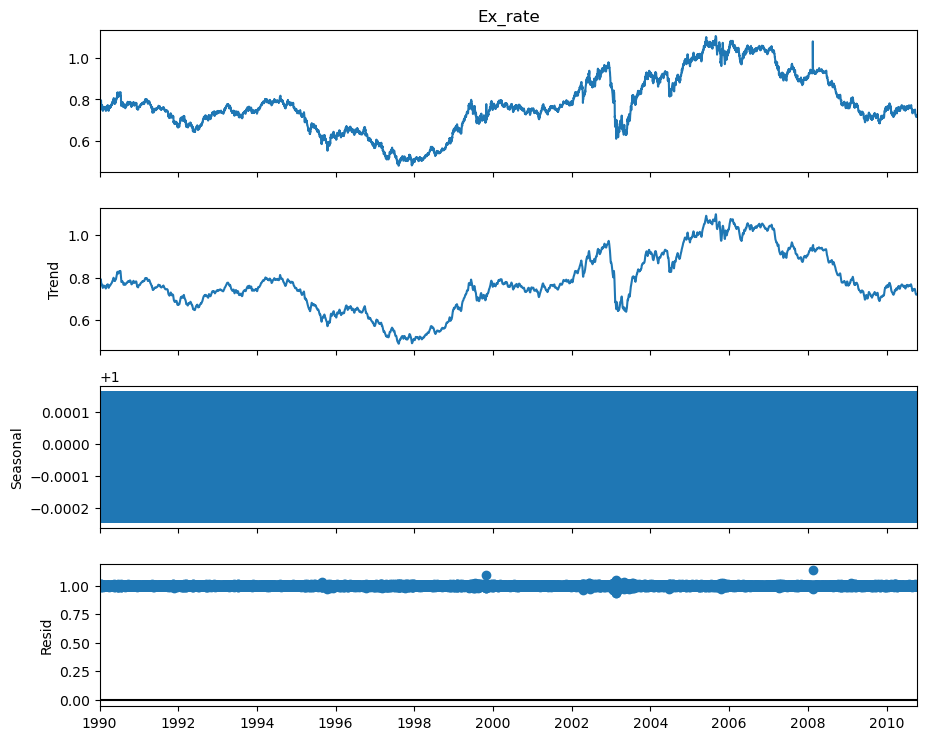

In [115]:

df.columns = ['date', 'Ex_rate']  # Ensure these are the correct column names

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Set the date column as the index
df.set_index('date', inplace=True)

# Ensure the index is sorted
df.sort_index(inplace=True)

# Set the frequency of the datetime index
df = df.asfreq('D')  # Assuming daily frequency

# Perform seasonal decomposition
result = seasonal_decompose(df['Ex_rate'], model='multiplicative')

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

<Axes: xlabel='date'>

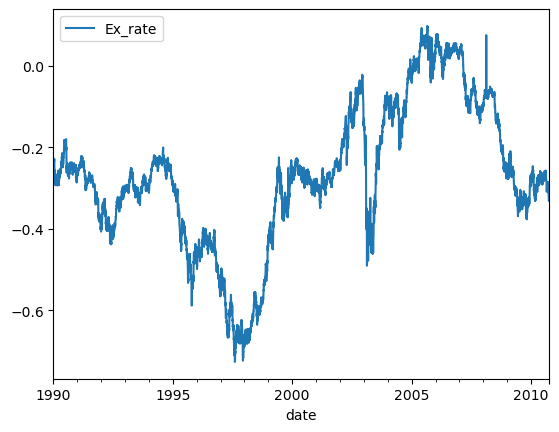

In [77]:
np.log(100)
ts_log_data=np.log(df).plot()
ts_log_data

# OneHotEncode 

In [116]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Ex_rate']

onehotencoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = onehotencoder.fit_transform(df[categorical_cols])

# Convert the result back to a DataFrame with appropriate column names
categorical_features = onehotencoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(df_encoded, columns=categorical_features)

print(df_encoded)

      Ex_rate_0.483697  Ex_rate_0.484347  Ex_rate_0.484742  Ex_rate_0.485543  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
7583               0.0               0.0               0.0               0.0   
7584               0.0               0.0               0.0               0.0   
7585               0.0               0.0               0.0               0.0   
7586               0.0               0.0               0.0               0.0   
7587               0.0               0.0               0.0               0.0   

      Ex_rate_0.487995  Ex_rate_0.4908 

# Model Building - ARIMA

Forecasted values for the next 2277 days:
2004-07-17    0.850305
2004-07-18    0.850387
2004-07-19    0.850360
2004-07-20    0.850369
2004-07-21    0.850366
                ...   
2010-10-06    0.850367
2010-10-07    0.850367
2010-10-08    0.850367
2010-10-09    0.850367
2010-10-10    0.850367
Freq: D, Name: predicted_mean, Length: 2277, dtype: float64
RMSE: 0.13217552152699955


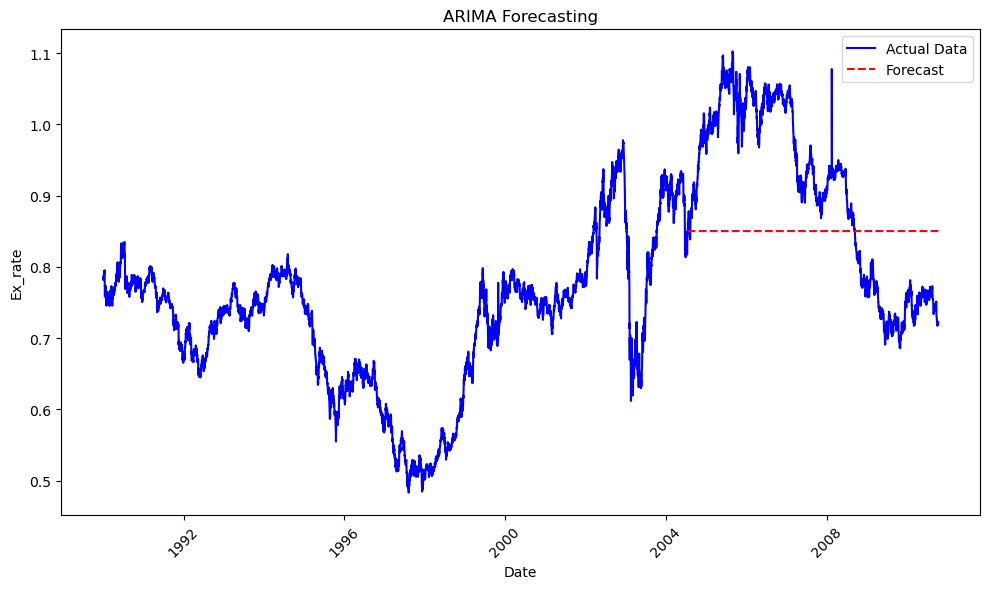

In [118]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Split data into training and test sets, preserving the sequence
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA
order = (1, 1, 1)  # ARIMA (p, d, q) # p-Number of lag observations included in the mode,d-degree of freedom q-Order of the moving average mode
model = ARIMA(train['Ex_rate'], order=order)
fitted_model = model.fit()

# Forecasting
forecast_horizon = len(test)  # Forecasting for the length of the test set
forecast = fitted_model.forecast(steps=forecast_horizon)


print(f"Forecasted values for the next {forecast_horizon} days:")
print(forecast)

# Evaluate forecast accuracy (example with RMSE)
rmse = np.sqrt(mean_squared_error(test['Ex_rate'], forecast))
print(f"RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual Data', color='blue')
plt.plot(test.index, forecast, label='Forecast', linestyle='--', color='red')



plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Ex_rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#SARIMAX

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


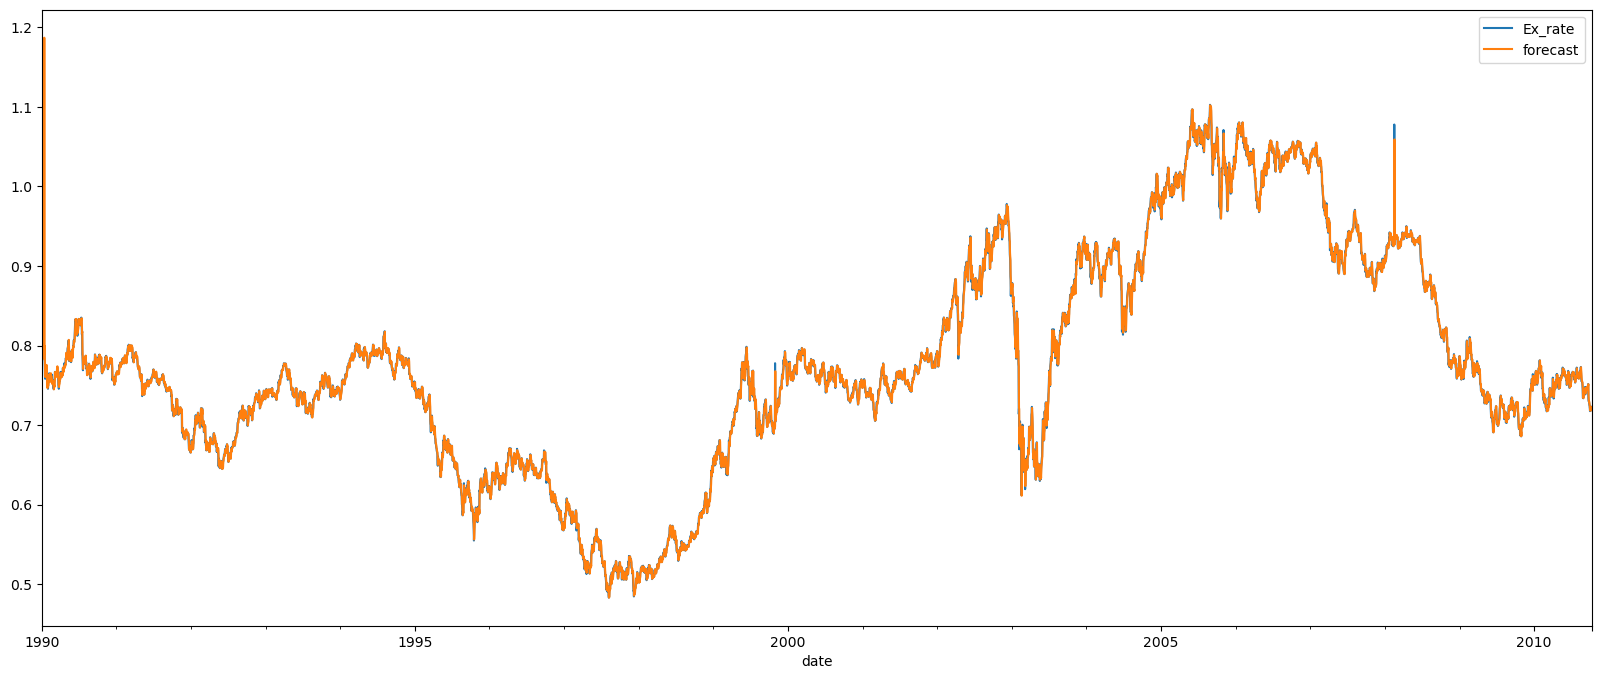

In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define and fit the SARIMAX model
model = SARIMAX(df['Ex_rate'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions
df['forecast'] = results.predict(start=1, end=len(df)-1)

# Plot the original and forecasted values
df[['Ex_rate', 'forecast']].plot(figsize=(20,8))
plt.show()


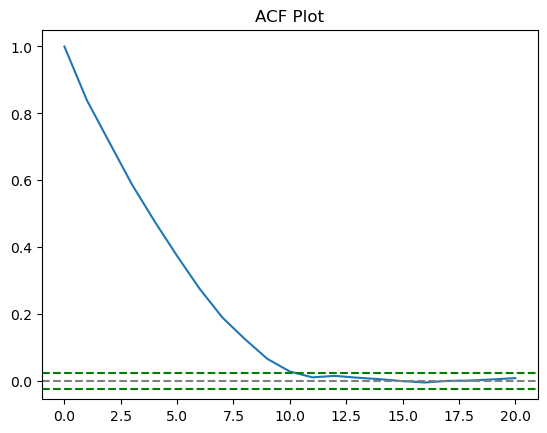

In [84]:
# Plotting the ACF curve

plt.plot(np.arange(0,21), acf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

In [120]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


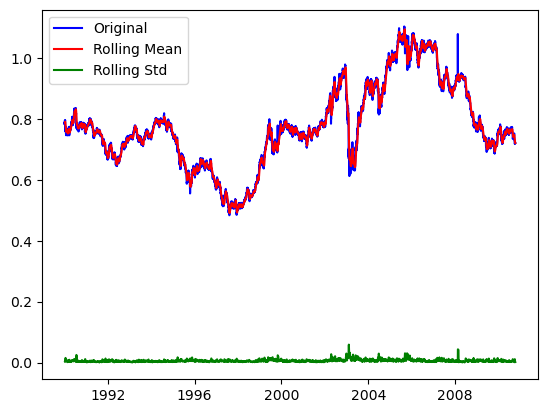

In [20]:
test_stationarity(df['Ex_rate'])

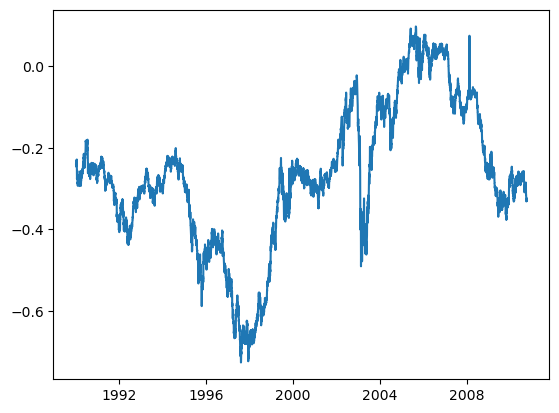

In [121]:
ts_data= df['Ex_rate']
ts_data_log= np.log(ts_data)
plt.plot(ts_data_log)


Text(0.5, 1.0, 'Moving Average')

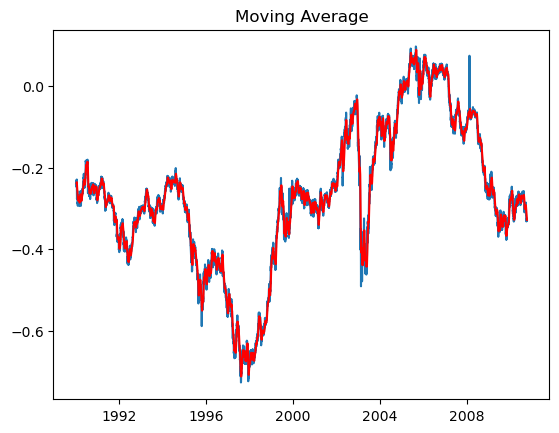

In [122]:
movingAverage = ts_data_log.rolling(window = 12).mean()
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')
plt.title('Moving Average')

In [123]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

date
1990-01-01         NaN
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-06         NaN
1990-01-07         NaN
1990-01-08         NaN
1990-01-09         NaN
1990-01-10         NaN
1990-01-11         NaN
1990-01-12    0.007278
1990-01-13    0.005678
1990-01-14    0.006632
1990-01-15   -0.017983
Freq: D, Name: Ex_rate, dtype: float64

In [125]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.shape

(7577,)

Results of Dickey-Fuller Test :

Test Statistic                -1.404275e+01
p-value                        3.281274e-26
#Lags Used                     2.900000e+01
Number of Observations Used    7.547000e+03
Critical Value (1%)           -3.431217e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


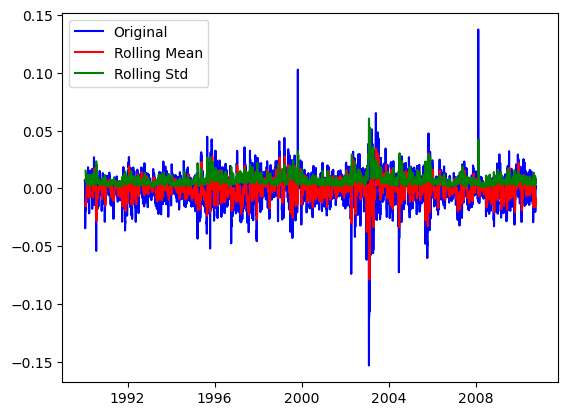

In [126]:
test_stationarity(ts_data_log_diff)

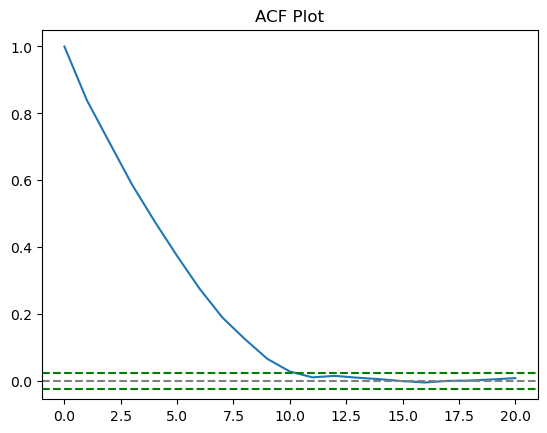

In [127]:
# Autocorrelation Function - ACF

plt.plot(np.arange(0,21), acf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

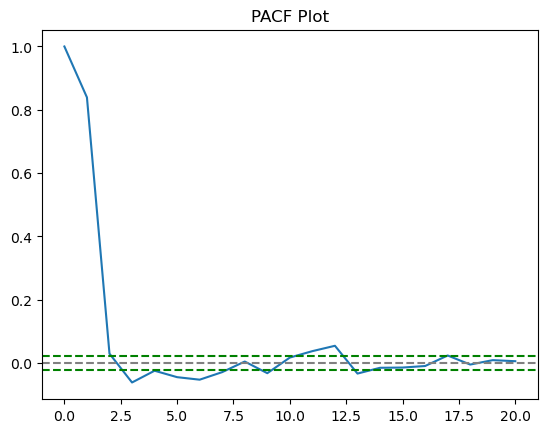

In [92]:
# Partial Autocorrelation Function

plt.plot(np.arange(0,21), pacf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [128]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [129]:
result = model.fit()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
result.predict()

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.781800
1990-01-04    0.786700
1990-01-05    0.786000
                ...   
2010-10-06    0.718463
2010-10-07    0.718794
2010-10-08    0.721263
2010-10-09    0.722886
2010-10-10    0.721411
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [131]:
result.forecast(steps=10)

2010-10-11    0.720914
2010-10-12    0.720547
2010-10-13    0.720083
2010-10-14    0.720348
2010-10-15    0.720574
2010-10-16    0.720309
2010-10-17    0.720335
2010-10-18    0.720003
2010-10-19    0.720360
2010-10-20    0.720185
Freq: D, Name: predicted_mean, dtype: float64

In [132]:
result.fittedvalues

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.781800
1990-01-04    0.786700
1990-01-05    0.786000
                ...   
2010-10-06    0.718463
2010-10-07    0.718794
2010-10-08    0.721263
2010-10-09    0.722886
2010-10-10    0.721411
Freq: D, Length: 7588, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

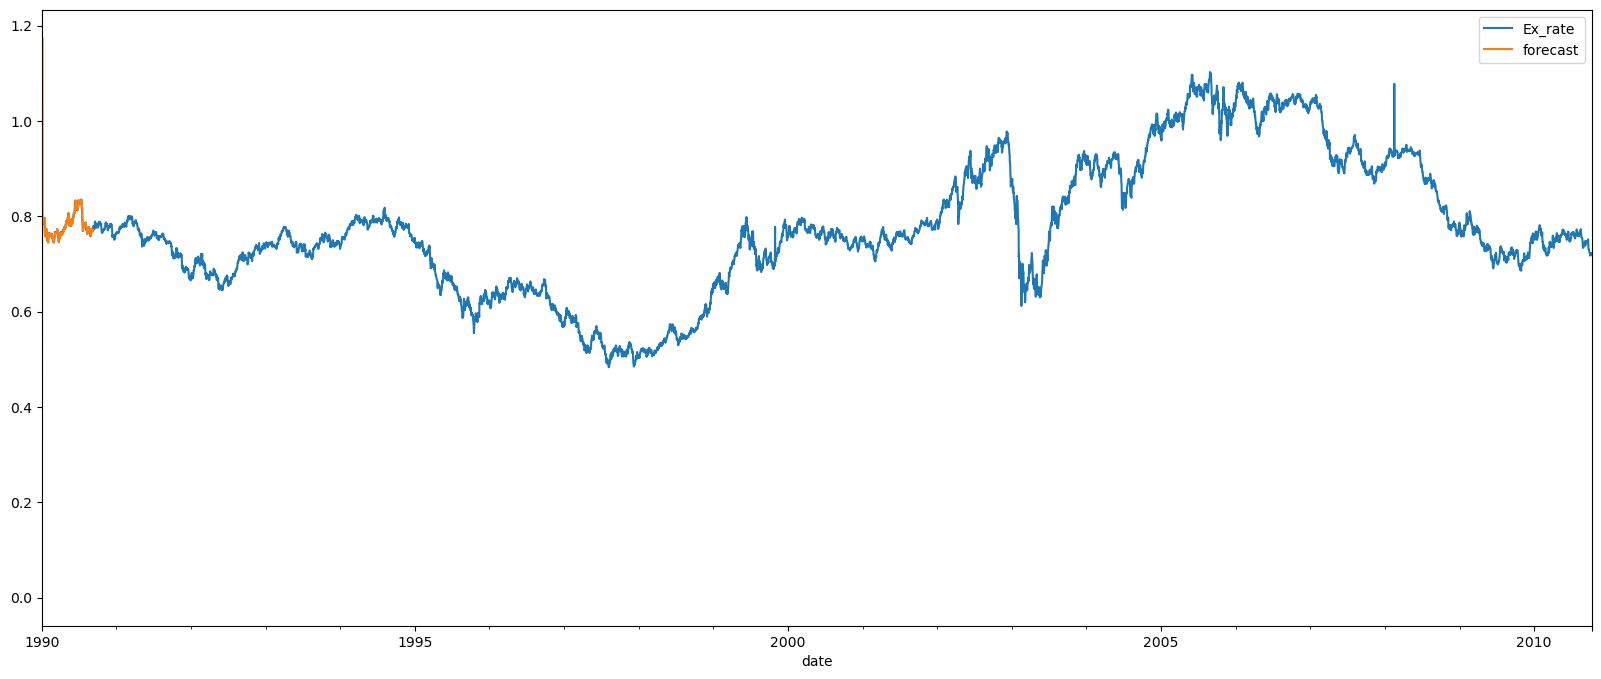

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model= SARIMAX(df['Ex_rate'],order=(1,1,1),seasonal_order=(1,1,1,2))
results1=Model.fit()
df['forecast']= results1.predict(start=0,end=250)
df[['Ex_rate','forecast']].plot(figsize=(20,8))

In [134]:
df.columns

Index(['Ex_rate', 'forecast'], dtype='object')

In [139]:
results1.predict()

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.781800
1990-01-04    0.786700
1990-01-05    0.786000
                ...   
2010-10-06    0.718463
2010-10-07    0.718794
2010-10-08    0.721263
2010-10-09    0.722886
2010-10-10    0.721411
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [140]:
df

,Ex_rate,forecast
date,,
1990-01-01,0.785500,0.0000
1990-01-02,0.781800,0.7855
1990-01-03,0.786700,0.7818
1990-01-04,0.786000,0.7867
1990-01-05,0.784900,0.7860
...,...,...
2010-10-06,0.718494,NaN
2010-10-07,0.721839,NaN
2010-10-08,0.723197,NaN


In [157]:
results1.forecast(20)

2010-10-11    0.720914
2010-10-12    0.720547
2010-10-13    0.720083
2010-10-14    0.720348
2010-10-15    0.720574
2010-10-16    0.720309
2010-10-17    0.720335
2010-10-18    0.720003
2010-10-19    0.720360
2010-10-20    0.720185
2010-10-21    0.720080
2010-10-22    0.720394
2010-10-23    0.720439
2010-10-24    0.720095
2010-10-25    0.719656
2010-10-26    0.719912
2010-10-27    0.720139
2010-10-28    0.719868
2010-10-29    0.719901
2010-10-30    0.719569
Freq: D, Name: predicted_mean, dtype: float64

In [156]:
results1.predict()

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.781800
1990-01-04    0.786700
1990-01-05    0.786000
                ...   
2010-10-06    0.718463
2010-10-07    0.718794
2010-10-08    0.721263
2010-10-09    0.722886
2010-10-10    0.721411
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [158]:
result.predict()

date
1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.781800
1990-01-04    0.786700
1990-01-05    0.786000
                ...   
2010-10-06    0.718463
2010-10-07    0.718794
2010-10-08    0.721263
2010-10-09    0.722886
2010-10-10    0.721411
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [162]:
results.forecast(20)

2010-10-11    0.720914
2010-10-12    0.720547
2010-10-13    0.720083
2010-10-14    0.720348
2010-10-15    0.720574
2010-10-16    0.720309
2010-10-17    0.720335
2010-10-18    0.720003
2010-10-19    0.720360
2010-10-20    0.720185
2010-10-21    0.720080
2010-10-22    0.720394
2010-10-23    0.720439
2010-10-24    0.720095
2010-10-25    0.719656
2010-10-26    0.719912
2010-10-27    0.720139
2010-10-28    0.719868
2010-10-29    0.719901
2010-10-30    0.719569
Freq: D, Name: predicted_mean, dtype: float64

In [163]:
d=adfuller(df['Ex_rate'])

In [178]:
# Compute error metrics
ses_mae = mean_absolute_error(test['Ex_rate'], ses_forecast)
ses_rmse = mean_squared_error(test['Ex_rate'], ses_forecast, squared=False)
ses_mape = mean_absolute_percentage_error(test['Ex_rate'], ses_forecast)

holt_mae = mean_absolute_error(test['Ex_rate'], holt_forecast)
holt_rmse = mean_squared_error(test['Ex_rate'], holt_forecast, squared=False)
holt_mape = mean_absolute_percentage_error(test['Ex_rate'], holt_forecast)

hw_mae = mean_absolute_error(test['Ex_rate'], hw_forecast)
hw_rmse = mean_squared_error(test['Ex_rate'], hw_forecast, squared=False)
hw_mape = mean_absolute_percentage_error(test['Ex_rate'], hw_forecast)

# Print error metrics

print("Simple Exponential Smoothing:")
print(f"MAE: {ses_mae}") #Mean Absolute Error
print(f"RMSE: {ses_rmse}")#Root Mean Squared Error (RMSE)
print(f"MAPE: {ses_mape}")# Mean Absolute Percentage Error (MAPE)

print("\nHolt’s Linear Trend:")
print(f"MAE: {holt_mae}") # Measures the average magnitude of errors in the forecasts, without considering their direction.
print(f"RMSE: {holt_rmse}")# Measures the square root of the average of squared differences between forecasted and observed values.
print(f"MAPE: {holt_mape}")# Measures the average absolute percentage error between forecasted and observed values

print("\nHolt-Winters Seasonal:")
print(f"MAE: {hw_mae}")
print(f"RMSE: {hw_rmse}")
print(f"MAPE: {hw_mape}")



Simple Exponential Smoothing:
MAE: 0.17763811683047734
RMSE: 0.20535637717674138
MAPE: 0.2278885648150685

Holt’s Linear Trend:
MAE: 0.12435939781328628
RMSE: 0.14379457154502917
MAPE: 0.15936714759509873

Holt-Winters Seasonal:
MAE: 0.17763338719452892
RMSE: 0.20535051576115193
MAPE: 0.22788231243900925


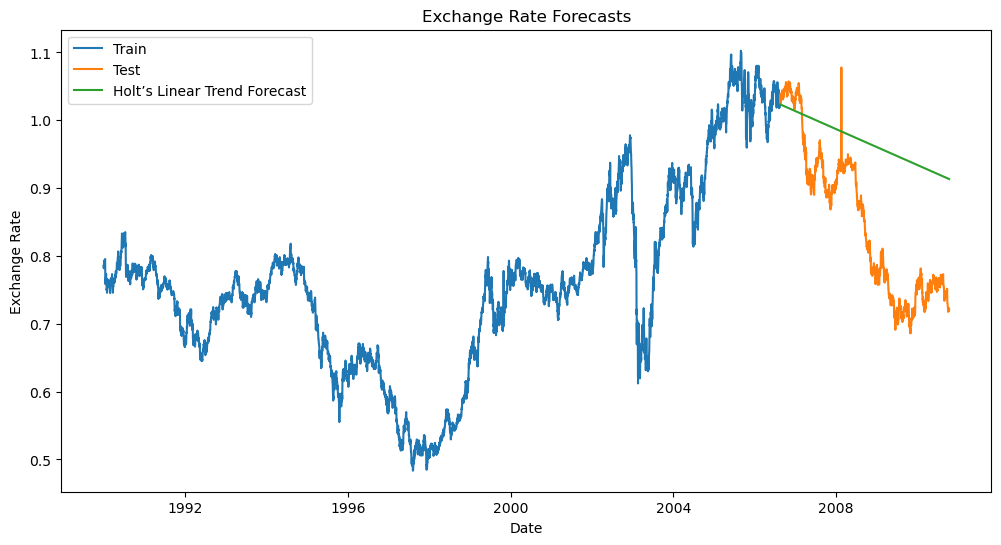

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import  Holt 


x = int(len(df) * 0.8)
y, test = df[:train_size], df[x:]


# Fit Holt's Linear Trend model
holt_model = Holt(y['Ex_rate']).fit()
holt_forecast = holt_model.forecast(steps=len(test))


# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(train['Ex_rate'], label='Train')
plt.plot(test['Ex_rate'], label='Test')
plt.plot(test.index, holt_forecast, label='Holt’s Linear Trend Forecast')
plt.title('Exchange Rate Forecasts')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()



In [ ]:
#Conclusion:
#The Simple Exponential Smoothing and Holt-Winters Seasonal models yielded the best performance for forecasting exchange rates in this dataset, with identical error metrics.
#The Holt’s Linear Trend model, while useful for series with a clear trend, was not as effective for this dataset.

#Splitting the data Training and test to  improve the perfomance and avoid overfitting of the model.

# Performance Metrics:
#Accuracy Measurement: By evaluating the model on the test set, we can calculate various performance metrics (e.g., MAE, RMSE, MAPE) that indicate how well the model is likely to perform on future data. 
#This helps in comparing different models and selecting the best one.
# we have found predicted and actual values used ARIMA and SARIMA Method 

#ACFand PACF plot shows a significant few lag and then drops off.
#ARIMA is visualized seasonality and SARIMA if there is a clear seasonal pattern.

